In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
!pip install openpyxl==3.1.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.1.5
    Uninstalling openpyxl-3.1.5:
      Successfully uninstalled openpyxl-3.1.5


# Day 06 - MATH/PHYS 241

For many problems in nature, the problem can be expressed in the form of a differential equation. Take for example Newton's 2nd law:

$$
\begin{align}
F &= m\frac{d^2 x}{dt^2} \tag{1}
\end{align}
$$

Therefore, it is incredibly important we learn methods and techniques to solve differential equaitons. However, before we can do that, we need to first review derivatives and how computers compute a derivative.

We can easily solve for the derivative of an equation on paper, but computers cannot do calculus (at least not the same way we do on paper). However, python can do arithmatic. This means we can make an algorithm to solve derivative equations for us.


# The Forward Difference Algorithm

Our first approach is to use the definition of the derivative:

$$
\begin{align}
\frac{d f}{d x} &= \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} \tag{2}
\end{align}
$$

Now, if we consider the [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series) around $f(x+h)$:

$$
\begin{align}
f(x+h) &=  f(x) + hf'(x) + \frac{h^2f''(x)}{2!} + \frac{h^3f'''(x)}{3!} + ... \tag{3}
\end{align}
$$

Note that $h$ represents a small step away from $x$.

We can now rearrange the terms in the Taylor Series and solve for $f'(x)$:

$$
\begin{align}
f_{fd}'(x) &= \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)  \tag{4}
\end{align}
$$

Where $\mathcal{O}(h)$ represents all of the higher order terms in the Taylor Series we are excluding from our calculation. This is a **truncation error** term, and is (at most) an unknown constant times $h$.

Equation 4 is basically the same thing as our definition of a derivative (equation 1) and represents an equation that the computer can perform to calculate the derivative of some function $f$ at the input value of $x$.

The step-size $h$ is used to determine the slope of the function around point $x$. We want $h$ to be small to keep our area of interest as close to $x$ as possible, but there are issues with having too small of $h$. Namely, as $h$ approaches 0, the numerator will have subtractive cancellation become an issue.

In python, we can easily define a forward differencing function:


In [6]:
# Forward difference derivative approximation
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

## Class Problem 1

As a simple example, let's look at the function $\sin x$

1. Define a function $f(x)$ that returns `np.sin(x)`

2. Use the `forward_diff()` function to calculate the numerical derivative of $\sin x$ for 100 values between $0$ and $2\pi$ using a step size $h = 0.01$

3. Compare the output to the known derivative: $\frac{d}{dx} \sin x = \cos x$

4. How does our function perform if we change the step size $h$ to larger or smaller values?  

The previous problem is great to see how the forward-differencing method works, but real world data will not look like an equation...

As an example, let's look at the position over time of a ball launched vertically into the air with quadratic drag present. Upload the "baseball_drag_Data.xlsx" file from Canvas or GitHub.

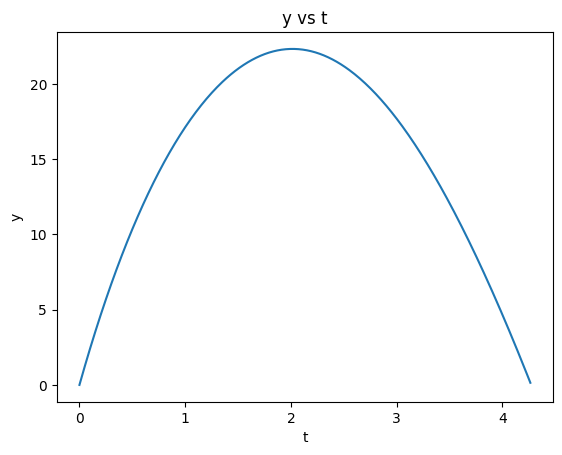

In [6]:
# Upload CSV file
df = pd.read_excel('baseball_drag_Data.xlsx')

plt.plot(df.iloc[:, 1], df.iloc[:, 0])
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[0])
plt.title(f"{df.columns[0]} vs {df.columns[1]}")
plt.show()

# Working with Descrete Data

The above plot shows the vertical position of the ball as a function of time. If there is no drag present, solving the equation of motion is a straight forward excersize for into physics students. Including air drag makes the problem more interesting, but also more difficult.

Regardless of drag being included, if we have the position, we should just be able to take the derivative to find the velocity since $\frac{dx}{dt} = v$.

However, we don't have an equation to take the derivative of, we just have data points. This limits our possible choice of step-size $h$. Assuming the data points are uniformly distributed in time (which they are), we can define $h$ as the time between successive samples.

`h = t[i+1] - t[i]`

While we may not know that the underlying function is to produce the position data, we do know the position at time $t$ and $t+1$. This makes the numerator of equation 4 look like:

`x[i+1] - x[i]`



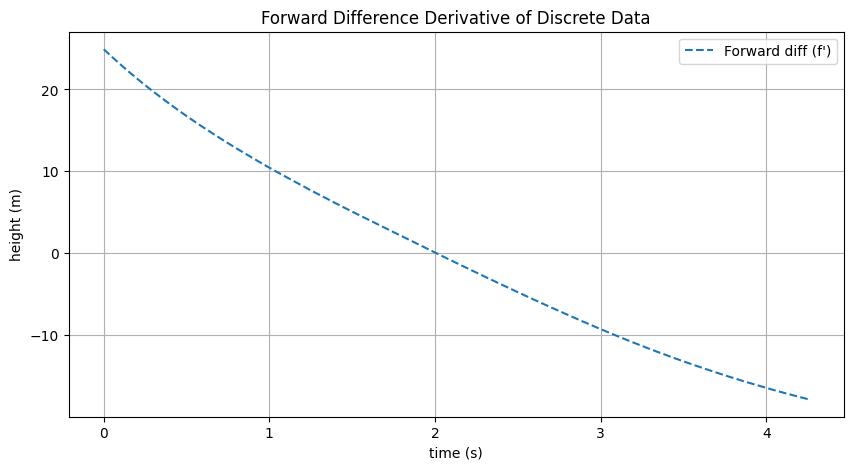

In [14]:
t = df['t']
y = df['y']

# Compute step size (assumes uniform spacing)
h = t[1] - t[0]

# Apply forward difference method

# define variable to store derivative result it
f_prime = np.zeros(len(y)-1)

# loop to calculate derivative
for i in range(len(y)-1):
    f_prime[i] = (y[i+1] - y[i]) / h

# Plot estimated derivative
plt.figure(figsize=(10, 5))
plt.plot(t[:-1], f_prime, label="Forward diff (f')", linestyle='--')
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.title("Forward Difference Derivative of Discrete Data")
plt.legend()
plt.grid(True)
plt.show()

# The Central Difference Algorithm

Instead of just taking a forward step $h$ and evaluating the function, we can take a half-step back and and half-step forward. In equation form, this looks like:

$$
\begin{align}
f'_{cd}(x) &= \frac{f(x+h/2) - f(x - h/2)}{h}  \tag{5}
\end{align}
$$

This is sometimes referred to as the symmetric difference quotient due to the symmetry in the numerator. Error terms in this version of the equation are approximately equal to $h^2$, which makes this equation more accurate for small $h$ relative to the forward difference algorithm.

## Class Problem 2

Use the Forward Differencing and Central Differencing methods to evaluate $e^{-x^2}$ at $x = 0, 10, 100$. Compare your results for different $h$. Does the central differencing method always perform better?

Make a plot of the error vs $h$. You can calculate the error by comparing to the known value of the derivative of the function at each value of $x$